In [ ]:
!pip install git+https://github.com/pycaret/pycaret.git@master --upgrade


  Cloning https://github.com/pycaret/pycaret.git (to revision master) to /tmp/pip-req-build-16sa01qu
  Running command git clone --filter=blob:none --quiet https://github.com/pycaret/pycaret.git /tmp/pip-req-build-16sa01qu
  Resolved https://github.com/pycaret/pycaret.git to commit 58ec3c282d58e94727f9d5b77b49f241e9103ab3
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
import pycaret
pycaret.__version__

'3.4.0'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
csv_file = "/content/drive/MyDrive/parkinsons_updrs.data"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pycaret
from pycaret.datasets import get_data


data = get_data('parkinsons')

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


In [ ]:
from pycaret.regression import setup

s = setup(
    data=data,
    target='total_UPDRS',
    ignore_features=['motor_UPDRS','subject#','age']
)

,Description,Value
0,Session id,6702
1,Target,total_UPDRS
2,Target type,Regression
3,Original data shape,"(5875, 22)"
4,Transformed data shape,"(5875, 19)"
5,Transformed train set shape,"(4112, 19)"
6,Transformed test set shape,"(1763, 19)"
7,Ignore features,3
8,Numeric features,18
9,Preprocess,True


In [ ]:
from pycaret.regression import compare_models, create_model

# compare baseline models
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,6.0336,63.3501,7.9513,0.4487,0.3071,0.2723,1.9540
lightgbm,Light Gradient Boosting Machine,6.4101,67.5866,8.2140,0.4124,0.3147,0.2840,0.6690
rf,Random Forest Regressor,6.3746,68.9062,8.2912,0.4016,0.3191,0.2868,7.6690
xgboost,Extreme Gradient Boosting,6.4015,70.1450,8.3664,0.3899,0.3182,0.2816,0.7410
gbr,Gradient Boosting Regressor,7.1848,79.7398,8.9219,0.3072,0.3392,0.3190,2.1460
ada,AdaBoost Regressor,8.2776,99.1454,9.9521,0.1379,0.3799,0.3761,0.7580
lr,Linear Regression,8.2955,102.7436,10.1297,0.1071,0.3771,0.3672,0.7590
br,Bayesian Ridge,8.3036,102.9195,10.1388,0.1056,0.3781,0.3677,0.0330
ridge,Ridge Regression,8.3295,103.4997,10.1672,0.1006,0.3797,0.3699,0.0420
knn,K Neighbors Regressor,8.3166,106.0157,10.2920,0.0766,0.3814,0.3617,0.0360


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [ ]:
from pycaret.regression import compare_models, create_model
best = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,5.4654,53.9428,7.3446,0.5030,0.2829,0.2405
1,6.1807,67.3561,8.2071,0.4227,0.3239,0.2888
2,6.0606,66.2491,8.1394,0.4291,0.3443,0.3153
3,5.8073,59.1282,7.6895,0.5216,0.3060,0.2732
4,6.0816,59.4872,7.7128,0.4945,0.2858,0.2580
5,6.1351,62.4354,7.9016,0.4594,0.2938,0.2589
6,6.3150,72.1839,8.4961,0.4302,0.3264,0.2890
7,5.6252,56.6391,7.5259,0.4426,0.2751,0.2359
8,6.3424,66.2844,8.1415,0.4318,0.3298,0.3022


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

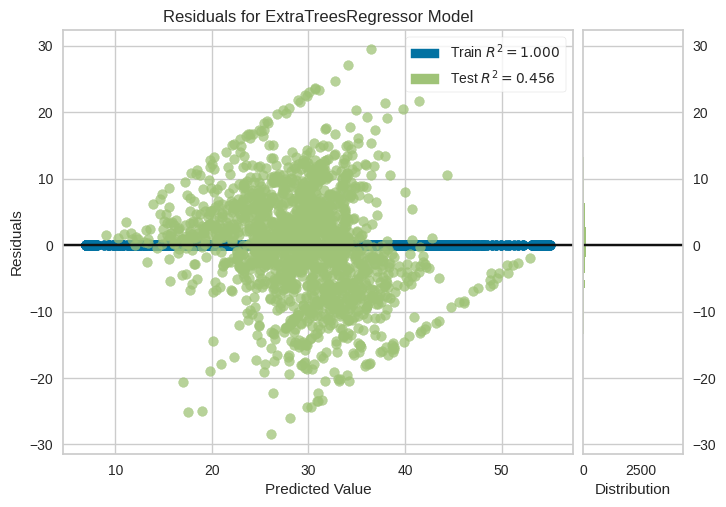

In [ ]:
from pycaret.regression import plot_model
plot_model(best, plot = 'residuals')

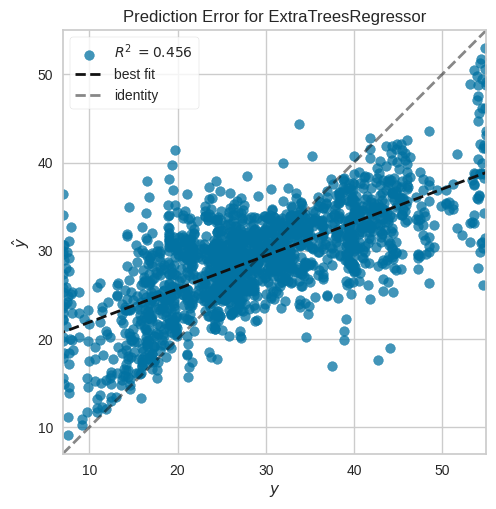

In [ ]:
plot_model(best, plot = 'error')

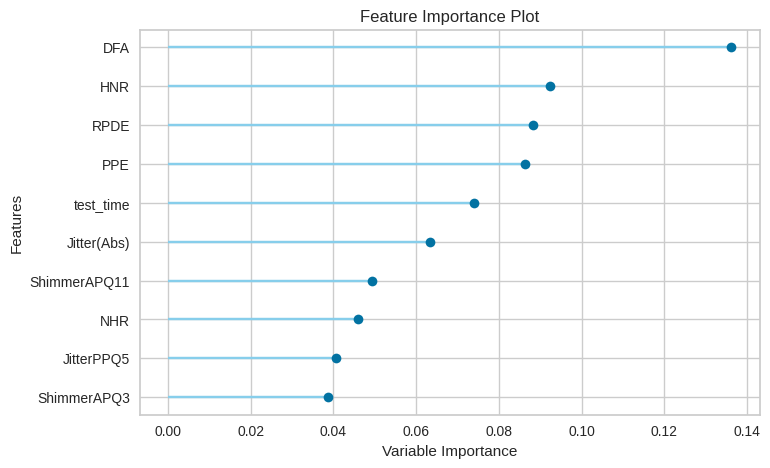

In [ ]:

plot_model(best, plot = 'feature')

In [ ]:
from pycaret.regression import predict_model
holdout_pred = predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,5.9362,61.2814,7.8282,0.4561,0.3021,0.2648


In [ ]:
holdout_pred.head()

,sex,test_time,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE,total_UPDRS,prediction_label
1842,1,55.806999,0.00327,0.000016,0.00155,0.00139,0.00464,0.01922,0.169,0.00988,0.01116,0.01414,0.02963,0.007228,25.115999,0.38688,0.57933,0.12177,24.787001,27.807679
5356,0,61.512001,0.00647,0.000045,0.00368,0.00380,0.01104,0.02178,0.187,0.01124,0.01236,0.01720,0.03371,0.035681,24.611000,0.47860,0.61457,0.21361,39.408001,31.923588
4541,0,66.657997,0.00818,0.000088,0.00481,0.00439,0.01444,0.03336,0.276,0.01738,0.01890,0.03044,0.05213,0.052032,15.613000,0.72826,0.71744,0.31874,31.070000,28.481810
420,0,49.271999,0.00338,0.000018,0.00139,0.00190,0.00417,0.01275,0.149,0.00529,0.00657,0.01010,0.01586,0.012655,23.466000,0.41652,0.55200,0.18154,29.927000,32.439360
517,0,92.553001,0.00314,0.000026,0.00142,0.00179,0.00426,0.03007,0.275,0.01460,0.01782,0.02457,0.04379,0.028888,21.403999,0.65353,0.61784,0.13389,26.011999,27.597460


In [ ]:

new_data = data.copy()
new_data.drop('total_UPDRS', axis=1, inplace=True)
new_data.head()

,subject#,age,sex,test_time,motor_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,0.00662,0.000034,0.00401,0.00317,0.01204,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,0.00300,0.000017,0.00132,0.00150,0.00395,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,0.00481,0.000025,0.00205,0.00208,0.00616,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,0.00528,0.000027,0.00191,0.00264,0.00573,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,0.00335,0.000020,0.00093,0.00130,0.00278,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


In [ ]:
predictions = predict_model(best, data = new_data)
predictions.head()

,subject#,age,sex,test_time,motor_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,...,Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE,prediction_label
0,1,72,0,5.643100,28.198999,0.00662,0.000034,0.00401,0.00317,0.01204,...,0.01438,0.01309,0.01662,0.04314,0.014290,21.639999,0.41888,0.54842,0.16006,34.397999
1,1,72,0,12.666000,28.447001,0.00300,0.000017,0.00132,0.00150,0.00395,...,0.00994,0.01072,0.01689,0.02982,0.011112,27.183001,0.43493,0.56477,0.10810,34.894001
2,1,72,0,19.681000,28.695000,0.00481,0.000025,0.00205,0.00208,0.00616,...,0.00734,0.00844,0.01458,0.02202,0.020220,23.047001,0.46222,0.54405,0.21014,35.389000
3,1,72,0,25.646999,28.905001,0.00528,0.000027,0.00191,0.00264,0.00573,...,0.01106,0.01265,0.01963,0.03317,0.027837,24.445000,0.48730,0.57794,0.33277,33.459968
4,1,72,0,33.641998,29.187000,0.00335,0.000020,0.00093,0.00130,0.00278,...,0.00679,0.00929,0.01819,0.02036,0.011625,26.125999,0.47188,0.56122,0.19361,36.375000


In [ ]:
from pycaret.regression import save_model
save_model(best, 'my_first_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['sex', 'test_time', 'Jitter(%)',
                                              'Jitter(Abs)', 'Jitter:RAP',
                                              'Jitter:PPQ5', 'Jitter:DDP',
                                              'Shimmer', 'Shimmer(dB)',
                                              'Shimmer:APQ3', 'Shimmer:APQ5',
                                              'Shimmer:APQ11', 'Shimmer:DDA',
                                              'NHR', 'HNR', 'RPDE', 'DFA',
                                              'PPE'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('clean_column_names',
                  TransformerWrapper(transfor

In [ ]:
from pycaret.regression import load_model
loaded_best_pipeline = load_model('my_first_pipeline')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['sex', 'test_time', 'Jitter(%)',
                                             'Jitter(Abs)', 'Jitter:RAP',
                                             'Jitter:PPQ5', 'Jitter:DDP',
                                             'Shimmer', 'Shimmer(dB)',
                                             'Shimmer:APQ3', 'Shimmer:APQ5',
                                             'Shimmer:APQ11', 'Shimmer:DDA',
                                             'NHR', 'HNR', 'RPDE', 'DFA',
                                             'PPE'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('clean_column_names',
                 TransformerWrapper(transformer=CleanColumnNames())),
                ('trained_model',
                 ExtraTreesRegressor(n_jobs=-1, random_state=6702))])